In [1]:
# look at some codebook entries from an example partially trained vqvae

import json
import matplotlib.pyplot as plt
import torch


In [2]:
project_path = "/home/bc/github/brendanchambers/tiny-vq-vae"
checkpoint_dir = f"{project_path}/models/checkpoints/explore-autoencoder-fashion-mnist_it100_lr3e-4_n256"
checkpoint_path = f"{checkpoint_dir}/checkpoint.pt"
config_path = f"{checkpoint_dir}/config.json"

# model_def = "{project_path}/packages/vector-quantize-pytorch/examples/explore_train_autoencoder.py"
import sys
sys.path.append(f"{project_path}/packages/vector-quantize-pytorch/examples")
from explore_train_autoencoder import SimpleVQAutoEncoder



/home/bc/miniconda3/envs/pytorch-env/lib/python3.11/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /opt/conda/conda-bld/pytorch_1724789121465/work/c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
# fyi running on cpu 

torch.cuda.is_available()
!nvidia-smi

In [3]:

with open(config_path, 'r') as f:
    config_dict = json.load(f)
print(json.dumps(config_dict, indent=1))

{
 "lr": 0.0003,
 "train_iter": 100,
 "num_codes": 256,
 "seed": 1234,
 "device": "cpu",
 "model_out_dir": "/home/bc/github/brendanchambers/tiny-vq-vae/models/checkpoints/explore-autoencoder-fashion-mnist_it100_lr3e-4_n256"
}


In [6]:
model_vqvae = SimpleVQAutoEncoder(codebook_size=config_dict['num_codes']).to(config_dict['device'])

checkpoint = torch.load(f"{config_dict['model_out_dir']}/checkpoint.pt", weights_only=False)
model_vqvae.load_state_dict(checkpoint)
model_vqvae.eval()

print(model_vqvae)


SimpleVQAutoEncoder(
  (layers): ModuleList(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): GELU(approximate='none')
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): VectorQuantize(
      (project_in): Identity()
      (project_out): Identity()
      (_codebook): EuclideanCodebook()
    )
    (6): Upsample(scale_factor=2.0, mode='nearest')
    (7): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): GELU(approximate='none')
    (9): Upsample(scale_factor=2.0, mode='nearest')
    (10): Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)


In [16]:
print(model_vqvae.layers[5]._codebook)
print(model_vqvae.layers[5]._codebook.embed)

EuclideanCodebook()
tensor([[[-4.4234e-07, -4.3865e-07,  2.3226e-07,  ..., -4.6138e-07,
           1.7414e-07, -1.4005e-07],
         [ 5.7444e-08,  3.8999e-07, -2.4171e-07,  ..., -4.8374e-07,
          -2.6675e-08,  5.3138e-07],
         [ 6.3957e-02,  1.3236e-01,  5.5057e-02,  ...,  4.2624e-02,
           7.3645e-02, -5.9223e-02],
         ...,
         [ 4.8946e-07,  4.3966e-07, -4.4023e-07,  ...,  3.5875e-07,
          -3.3900e-07,  7.0244e-08],
         [-5.1954e-07,  2.2693e-08, -2.2712e-07,  ...,  4.2189e-07,
          -2.8461e-07,  2.5757e-07],
         [ 3.4160e-07,  4.3311e-08,  6.8783e-08,  ...,  3.5466e-07,
           5.8590e-08, -5.3264e-08]]])


torch.Size([1, 256, 32])


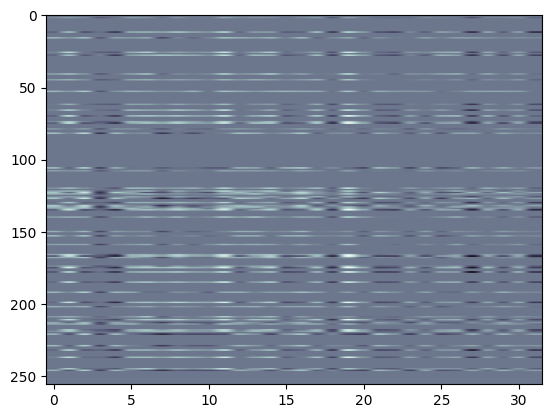

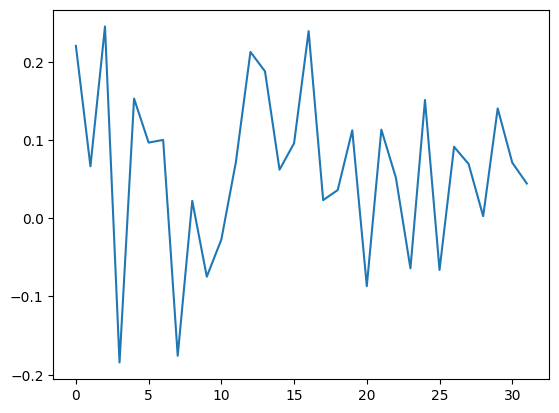

In [44]:
codebook_embeddings = model_vqvae.layers[5]._codebook.embed   # 1 x 256 x 32
print(codebook_embeddings.size())

codebook_embeddings = codebook_embeddings.numpy().squeeze()

plt.figure()
plt.imshow(codebook_embeddings, aspect='auto', cmap='bone')

# lots of dead codes & and similar embeddings

sample_id = 150
sample_embed = codebook_embeddings[sample_id,:]
plt.figure()
plt.plot(sample_embed)

In [59]:
sample_embed = torch.FloatTensor(model_vqvae.layers[5]._codebook.embed[0,sample_id,:]).reshape(1,1,32)
print(sample_embed.size())

torch.Size([1, 1, 32])


In [63]:
import numpy as np

i_layers = [6]

input = sample_embed
for i_layer in i_layers:
    print(i_layer)
    output = model_vqvae.layers[i_layer](input)
    input = output

v_out = output.numpy().squeeze()
print(np.shape(v_out))
plt.plot(v_out)

RuntimeError: Given groups=1, weight of size [16, 32, 3, 3], expected input[1, 1, 1, 64] to have 32 channels, but got 1 channels instead